In [2]:
from imports import *
PATH = '../data/mpg_ggplot2.csv'
df = pd.read_csv(PATH)
gb_df = df.groupby(['cty', 'hwy']).size().reset_index(name='counts')

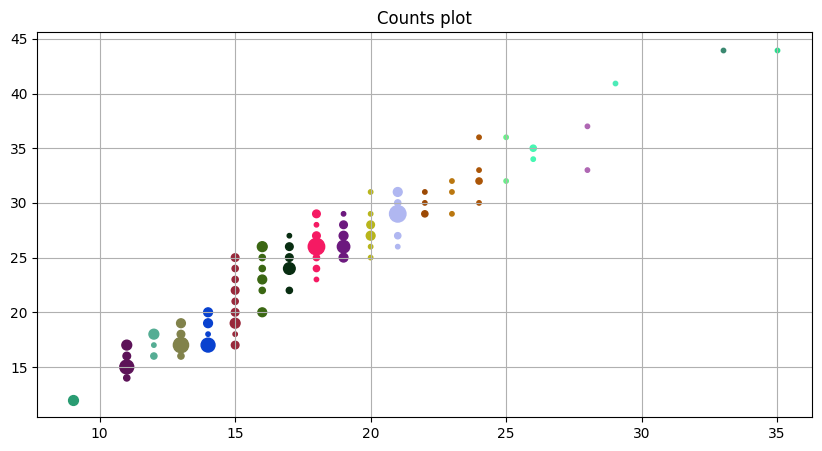

In [9]:
gb_df.sort_values(['cty', 'hwy', 'counts'], ascending=True, inplace=True)

colors = {i:np.random.random(3,) for i in sorted(list(gb_df['cty'].unique()))}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

# iterate over each category and plot the data. This way every group has it's own color and size
for x in sorted(list(gb_df['cty'].unique())):
    # get x and y values for each group
    x_values = gb_df[gb_df['cty'] == x]['cty']
    y_values = gb_df[gb_df['cty'] == x]['hwy']
    
    # extract the sie of each group to plot
    size = gb_df[gb_df['cty'] == x]['counts']
    
    # extract the color for each group and convert it from rgb to hex
    color = matplotlib.colors.rgb2hex(colors[x])
    
    # plot the data
    ax.scatter(x_values, y_values, s = size*10, c = color)
ax.set_title('Counts plot')
plt.grid()